# Julia for Data Science

* Data
* **Data processing**
* Visualization

### Data processing: Standard machine learning algorithms in Julia
In what's next, we will see how to use some of the standard machine learning algorithms implemented in Julia.

In [52]:
using DataFrames, CSV

### Example 1: Kmeans Clustering

Let's start with some data.

The Sacramento real estate transactions file that we download next is a list of 985 real estate transactions in the Sacramento area reported over a five-day period,

In [66]:
isfile("houses.csv") ||
    download("http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv","houses.csv")

houses = CSV.read("houses.csv")

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271
10,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.7009,-121.443


Let's use `Plots` to plot with the `pyplot` backend.

In [56]:
using Plots

pyplot(size=(500,350),leg=false)

Plots.PyPlotBackend()

Now let's create a scatter plot to show the price of a house vs. its square footage,

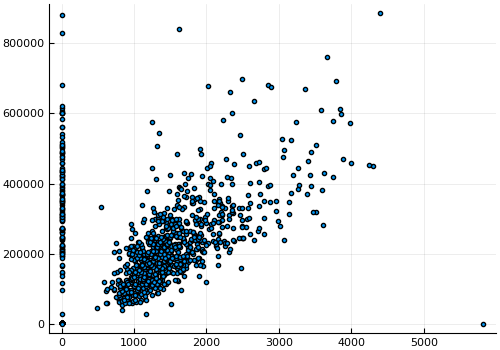

In [57]:
x = houses[:sq__ft]
y = houses[:price]
scatter(x, y, markersize=3)

*Houses with 0 square feet that cost money?*

The square footage seems to not have been recorded in these cases. 

Filtering these houses out is easy to do!

In [58]:
houses[:sq__ft]

985-element Array{Union{Int64, Missings.Missing},1}:
  836
 1167
  796
  852
  797
 1122
 1104
 1177
  941
 1146
  909
 1289
  871
    ⋮
    0
 1456
 1450
 1358
 1329
 1715
 1262
 2280
 1477
 1216
 1685
 1362

In [63]:
houses[:sq__ft][1] = missing;
houses[:sq__ft]

985-element Array{Union{Int64, Missings.Missing},1}:
     missing
 1167       
  796       
  852       
  797       
 1122       
 1104       
 1177       
  941       
 1146       
  909       
 1289       
  871       
    ⋮       
    0       
 1456       
 1450       
 1358       
 1329       
 1715       
 1262       
 2280       
 1477       
 1216       
 1685       
 1362       

In [64]:
houses

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,missing,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271
10,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.7009,-121.443


In [68]:
houses[:sq__ft] .> 0

985-element BitArray{1}:
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
     ⋮
 false
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true

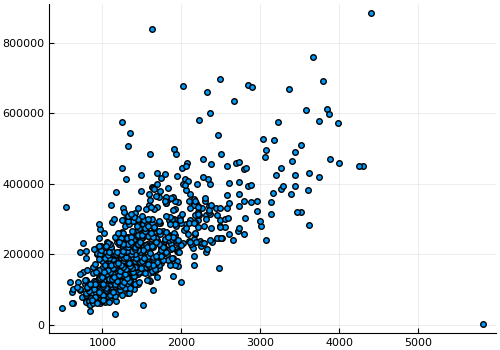

In [69]:
filter_houses = houses[houses[:sq__ft] .> 0, :]
x = filter_houses[:sq__ft]
y = filter_houses[:price]
scatter(x,y)

This makes sense! The higher the square footage, the higher the price.

We can filter a `DataFrame` by feature value too, using the `by` function.

In [70]:
by(filter_houses, :type, size)

,type,x1
1,Residential,"(759, 12)"
2,Condo,"(42, 12)"
3,Multi-Family,"(13, 12)"


In [71]:
by(filter_houses, :type, filter_houses->mean(filter_houses[:price]))

,type,x1
1,Residential,2.34802e5
2,Condo,1.34213e5
3,Multi-Family,2.24535e5


Now let's do some kmeans clustering on this data.

First, we can load the `Clustering` package to do this.

In [72]:
#Pkg.add("Clustering")
using Clustering

Let's store the features `:latitude` and `:longitude` in an array `X` that we will pass to `kmeans`.

In [74]:
X = filter_houses[[:latitude,:longitude]]
X = Matrix{Float64}(X)

814×2 Array{Float64,2}:
 38.6319  -121.435
 38.4789  -121.431
 38.6183  -121.444
 38.6168  -121.439
 38.5195  -121.436
 38.6626  -121.328
 38.6817  -121.352
 38.5351  -121.481
 38.6212  -121.271
 38.7009  -121.443
 38.6377  -121.452
 38.4707  -121.459
 38.6187  -121.436
  ⋮               
 38.7035  -121.375
 38.7031  -121.235
 38.3898  -121.446
 38.8978  -121.325
 38.4679  -121.445
 38.4453  -121.442
 38.4174  -121.484
 38.4577  -121.36 
 38.4999  -121.459
 38.7088  -121.257
 38.417   -121.397
 38.6552  -121.076

Each feature is stored as a row of `X`, but we can transpose to make these features columns of `X`.

In [75]:
X = X'

2×814 Array{Float64,2}:
   38.6319    38.4789    38.6183  …    38.7088    38.417    38.6552
 -121.435   -121.431   -121.444      -121.257   -121.397  -121.076 

As a first pass at guessing how many clusters we might need, let's use the number of zip codes in our data.

(Try changing this to see how it impacts results!)

In [76]:
k = length(unique(filter_houses[:zip]))

66

We can use the `kmeans` function to do kmeans clustering!

In [77]:
C = kmeans(X, k) # try changing k

Clustering.KmeansResult{Float64}([38.5328 38.3951 … 38.4892 38.6236; -121.431 -121.438 … -121.41 -121.488], [35, 20, 38, 35, 1, 58, 7, 37, 54, 16  …  2, 60, 20, 59, 12, 21, 24, 19, 45, 34], [2.83184e-5, 0.00023446, 0.000130444, 0.000162971, 0.000197105, 4.76613e-5, 0.000147406, 0.000259497, 1.1449e-5, 0.000116867  …  0.000101308, 5.24133e-5, 1.56193e-5, 0.000182006, 0.000134158, 5.99319e-5, 0.000814106, 9.20511e-5, 0.000545637, 7.06133e-5], [17, 33, 19, 4, 3, 7, 12, 27, 20, 19  …  20, 12, 20, 3, 7, 21, 8, 27, 9, 14], [17.0, 33.0, 19.0, 4.0, 3.0, 7.0, 12.0, 27.0, 20.0, 19.0  …  20.0, 12.0, 20.0, 3.0, 7.0, 21.0, 8.0, 27.0, 9.0, 14.0], 0.2069887660072709, 13, true)

In [78]:
fieldnames(C)

8-element Array{Symbol,1}:
 :centers    
 :assignments
 :costs      
 :counts     
 :cweights   
 :totalcost  
 :iterations 
 :converged  

Now let's create a new data frame, `df`, with all the same data as `filter_houses` that also includes a column for the cluster to which each house has been assigned.

In [79]:
df = DataFrame(cluster = C.assignments,city = filter_houses[:city],
    latitude = filter_houses[:latitude],longitude = filter_houses[:longitude],zip = filter_houses[:zip])

,cluster,city,latitude,longitude,zip
1,35,SACRAMENTO,38.6319,-121.435,95838
2,20,SACRAMENTO,38.4789,-121.431,95823
3,38,SACRAMENTO,38.6183,-121.444,95815
4,35,SACRAMENTO,38.6168,-121.439,95815
5,1,SACRAMENTO,38.5195,-121.436,95824
6,58,SACRAMENTO,38.6626,-121.328,95841
7,7,SACRAMENTO,38.6817,-121.352,95842
8,37,SACRAMENTO,38.5351,-121.481,95820
9,54,RANCHO CORDOVA,38.6212,-121.271,95670
10,16,RIO LINDA,38.7009,-121.443,95673


Let's plot each cluster as a different color.

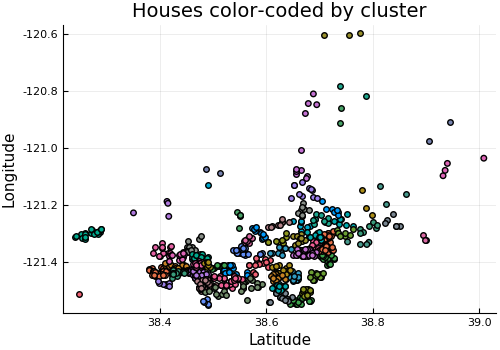

In [80]:
clusters_figure = plot()
for i = 1:k
    clustered_houses = df[df[:cluster].== i,:]
    xvals = clustered_houses[:latitude]
    yvals = clustered_houses[:longitude]
    scatter!(clusters_figure,xvals,yvals,markersize=4)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")
display(clusters_figure)

And now let's try coloring them by zip code.

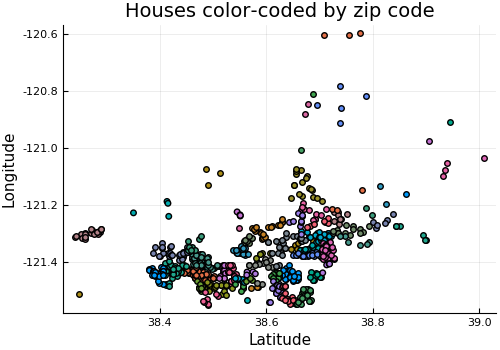

In [81]:
unique_zips = unique(filter_houses[:zip])
zips_figure = plot()
for uzip in unique_zips
    subs = filter_houses[filter_houses[:zip].==uzip,:]
    x = subs[:latitude]
    y = subs[:longitude]
    scatter!(zips_figure,x,y)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by zip code")
display(zips_figure)

Let's see the two plots side by side.

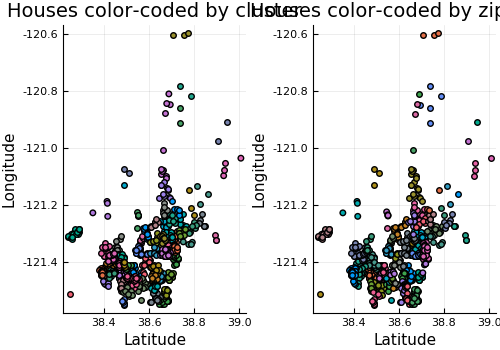

In [83]:
plot(clusters_figure,zips_figure,layout=(1, 2))

Not exactly! but almost... Now we know that ZIP codes are not randomly assigned!

### Example 2: Nearest Neighbor with a KDTree

For this example, let's start by loading the `NearestNeighbors` package.

In [84]:
using NearestNeighbors

With this package, we'll look for the `knearest` neighbors of one of the houses, `point`.

In [88]:
knearest = 10
id = 99 # try changing this
point = X[:,id]

2-element Array{Float64,1}:
   38.6489
 -121.544 

Now we can build a `KDTree` and use `knn` to look for `point`'s nearest neighbors!

In [89]:
kdtree = KDTree(X)
idxs, dists = knn(kdtree, point, knearest, true)

([99, 403, 97, 665, 74, 41, 508, 115, 606, 227], [0.0, 0.00672818, 0.0081818, 0.0095845, 0.00995926, 0.0100737, 0.0100737, 0.0108062, 0.0110454, 0.013221])

In [90]:
kdtree

NearestNeighbors.KDTree{StaticArrays.SArray{Tuple{2},Float64,1,2},Distances.Euclidean,Float64}
  Number of points: 814
  Dimensions: 2
  Metric: Distances.Euclidean(0.0)
  Reordered: true

We'll first generate a plot with all of the houses in the same color,

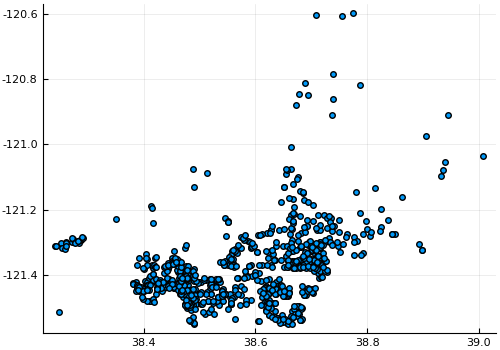

In [91]:
x = filter_houses[:latitude];
y = filter_houses[:longitude];
scatter(x,y)

and then overlay the data corresponding to the nearest neighbors of `point` in a different color.

In [96]:
idxs, dists = knn(kdtree, X[:,555], knearest, true)

([555, 521, 350, 351, 711, 778, 494, 713, 497, 722], [0.0, 0.00166211, 0.00521531, 0.00521531, 0.00715094, 0.00924126, 0.00944051, 0.00957699, 0.00958055, 0.00992484])

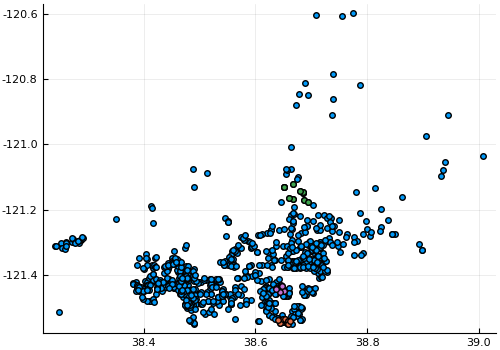

In [94]:
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y)

There are those nearest neighbors in red!

We can see the cities of the neighboring houses by using the indices, `idxs`, and the feature, `:city`, to index into the `DataFrame` `filter_houses`.

In [97]:
cities = filter_houses[idxs,:city]

10-element CategoricalArrays.CategoricalArray{Union{Missings.Missing, String},1,UInt32}:
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"

### Example 3: PCA for dimensionality reduction

Let us try to reduce the dimensions of the price/area data from the houses dataset.

We can start by grabbing the square footage and prices of the houses and storing them in an `Array`.

In [99]:
F = filter_houses[[:sq__ft,:price]]
F = Matrix{Float64}(F)'

2×814 Array{Float64,2}:
   836.0   1167.0    796.0    852.0    797.0  …    1216.0    1685.0    1362.0
 59222.0  68212.0  68880.0  69307.0  81900.0     235000.0  235301.0  235738.0

Recall how the data looks when we plot housing prices against square footage.

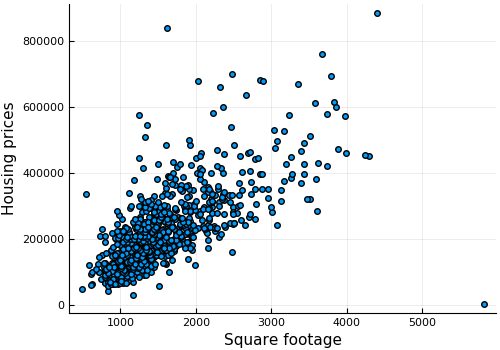

In [100]:
scatter(F[1,:],F[2,:])
xlabel!("Square footage")
ylabel!("Housing prices")

We can use the `MultivariateStats` package to run PCA

In [101]:
# Pkg.add("MultivariateStats")
using MultivariateStats

Use `fit` to fit the model

In [102]:
M = fit(PCA, F)

PCA(indim = 2, outdim = 1, principalratio = 0.99998)

Note that you can choose the maximum dimension of the new space by setting `maxoutdim`, and you can change the method to, for example, `:svd` with the following syntax.

```julia
fit(PCA, F; maxoutdim = 1,method=:svd)
```

It seems like we only get one dimension with PCA! Let's use `transform` to map all of our 2D data in `F` to `1D` data with our model, `M`.

In [103]:
y = transform(M, F)

1×814 Array{Float64,2}:
 -170228.0  -1.61237e5  -1.6057e5  …  4551.16  5550.15  5852.95  6288.7

Let's use `reconstruct` to put our now 1D data, `y`, in a form that we can easily overlay (`Xr`) with our 2D data in `F` along the principle direction/component.

In [104]:
Xr = reconstruct(M, y)

2×814 Array{Float64,2}:
   936.922    971.477    974.039    975.681  …  1613.64         1615.32
 59221.6    68212.8    68879.3    69306.5          2.35301e5  235737.0 

And now we create that overlay, where we can see points along the principle component in red. 

(Each blue point maps uniquely to some red point!)

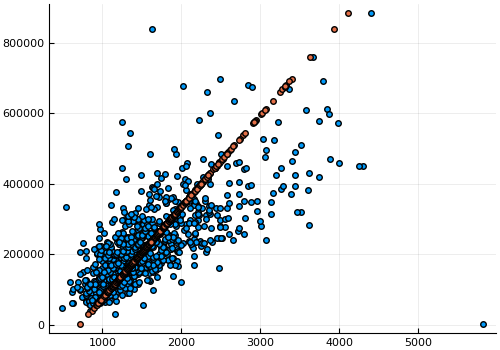

In [105]:
scatter(F[1,:],F[2,:])
scatter!(Xr[1,:],Xr[2,:])

### Example 4: Learn how to build a simple multi-layer-perceptron on the MNIST dataset

MNIST from: https://github.com/FluxML/model-zoo/blob/master/mnist/mlp.jl

Let's start by loading `Flux`, importing a few things from `Flux` explicitly, and bringing the `repeated` function into our scope.

In [ ]:
using Flux, Flux.Data.MNIST
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated

We can now store all the MNIST images in `imgs` and take a peak into this vector to see what the data looks like

In [ ]:
imgs = MNIST.images()
imgs[3]

Let's look at the type of an individual image.

In [ ]:
typeof(imgs[3])

#### Reorganizing our array of images

We see this is a 2D array that stores `ColorTypes`. To work more easily with this data, let's convert all `ColorTypes` to floating point numbers.

In [ ]:
fpt_imgs = float.(imgs)

Now we can see what `imgs[3]` looks like as an array of floats, rather than as an array of colors!

In [ ]:
fpt_imgs[3]

**Let's stack the images to create one large 2D array, `X`, that stores the data for each image as a column.**

To do this, we can **first** use `reshape` to unravel each image, creating a 1D array (`Vector`) of floats from a 2D array (`Matrix`) of floats.

In [ ]:
unraveled_fpt_imgs = reshape.(fpt_imgs, :);
typeof(unraveled_fpt_imgs)

(Note that `Vector` is an alias for a 1D `Array`.)

In [ ]:
Vector

This makes `unraveled_fpt_imgs` a `Vector` of `Vector`s where `imgs[3]` is now

In [ ]:
unraveled_fpt_imgs[3]

After using `reshape` to get a `Vector` of `Vector`s, we can use `hcat` to build a `Matrix`, `X`, from `unraveled_fpt_imgs` where the `Vector`s stored in `unraveled_fpt_imgs` will become the columns of `X`.

Note that we're using the "splat" command below, `...`, which allows you to pass all the elements of an object to a function, rather than just passing the object itself.

In [ ]:
X = hcat(unraveled_fpt_imgs...)

#### How to go back to images from this 2D `Array`

So now each column in X is an image reshaped to a vector of floating points. Let's pick one column and see what the digit is.

Let's try to view the second image in the original array, `imgs`, by taking the second column of `X`

In [ ]:
onefigure = X[:,2]

We'll `reshape` this array to a 2D, 28x28 array,

In [ ]:
t1 = reshape(onefigure,28,28)

and finally use `colorview` from the `Images` package to view the handwritten digit.

In [ ]:
using Images

In [ ]:
colorview(Gray, t1)

*Our data is in working order!*

For our machine to learn the digit with which each image is associated, we'll need to train it using correct answers. Therefore we'll make use of the `labels` associated with these images from MNIST.

In [ ]:
labels = MNIST.labels() # the true labels

One-hot-encode the labels with `onehotbatch`

In [ ]:
Y = onehotbatch(labels, 0:9)

which gives a binary indicator vector for each figure

Build the network

In [ ]:
m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)

Define the loss functions and accuracy

In [ ]:
loss(x, y) = Flux.crossentropy(m(x), y)
accuracy(x, y) = mean(argmax(m(x)) .== argmax(y))

Use `X` to create our training data and then declare our evaluation function:

In [ ]:
dataset = repeated((X, Y), 200)
evalcb = () -> @show(loss(X, Y))
opt = ADAM(Flux.params(m))

So far, we have defined our training data and our evaluation functions.

Let's take a look at the function signature of Flux.train!

In [ ]:
?Flux.train!

**Now we can train our model and look at the accuracy thereafter.**

In [ ]:
Flux.train!(loss, dataset, opt, cb = throttle(evalcb, 10))

accuracy(X, Y)

Now that we've trained our model, let's create test data, `tX`, 

In [ ]:
tX = hcat(float.(reshape.(MNIST.images(:test), :))...)

and run our model on one of the images from `tX`

In [ ]:
test_image = m(tX[:,1])

In [ ]:
indmax(test_image) - 1

The largest element of `test_image` is the 8th element, so our model says that test_image is a "7".

Now we can look at the original image.

In [ ]:
using Images
t1 = reshape(tX[:,1],28,28)
colorview(Gray, t1)

and there we have it!

### Example 5: Linear regression in Julia (we will write our own Julia code and Python code)

Let's try to find the best line fit of the following data:

In [ ]:
xvals = repeat(1:0.5:10,inner=2)
yvals = 3+xvals+2*rand(length(xvals))-1
scatter(xvals,yvals,color=:black,leg=false)

We want to fit a line through this data.

Let's write a Julia function to do this.

In [ ]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end

To fit the line, we just need to find the slope and the y-intercept (a and b).

Then add this fit to the existing plot!

In [ ]:
a,b = find_best_fit(xvals,yvals)
ynew = a*xvals + b

In [ ]:
plot!(xvals,ynew)

Let's generate a much bigger dataset,

In [ ]:
xvals = 1:100000;
xvals = repeat(xvals,inner=3);
yvals = 3+xvals+2*rand(length(xvals))-1;

In [ ]:
@show size(xvals)
@show size(yvals)

and now we can time how long it takes to find a fit to this data.

In [ ]:
@time a,b = find_best_fit(xvals,yvals)

Now we will write the same code using Python

In [ ]:
using PyCall
using Conda

In [ ]:
py"""
import numpy
def find_best_fit_python(xvals,yvals):
    meanx = numpy.mean(xvals)
    meany = numpy.mean(yvals)
    stdx = numpy.std(xvals)
    stdy = numpy.std(yvals)
    r = numpy.corrcoef(xvals,yvals)[0][1]
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
"""

In [ ]:
find_best_fit_python = py"find_best_fit_python"

In [ ]:
xpy = PyObject(xvals)
ypy = PyObject(yvals)
@time a,b = find_best_fit_python(xpy,ypy)

**Let's use the benchmarking package to time these two.**

In [ ]:
using BenchmarkTools

In [ ]:
@btime a,b = find_best_fit_python(xvals,yvals)

In [ ]:
@btime a,b = find_best_fit(xvals,yvals)